In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model

np.random.seed(0)

a) (Re-)implement Example 4.3. This time, however you need to implement the linear regression yourself, without a machine learning library. (If you implement in Python, just start from the available Jupyter notebook.) Verify the correctness of your implementation by cross-checking it with Example 4.3.

In [2]:
class LinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        if X_train is None:
            raise Exception('Training feature data has not bee provided')
        
        if y_train is None:
            raise Exception('Training prediction data has not been provided')
            
        self.X_train = np.concatenate((np.ones(((X_train.shape[0]), 1)), X_train), axis=1)
        self.y_train = y_train

        b = np.matmul(self.X_train.T, self.y_train)
        A = np.matmul(self.X_train.T, self.X_train)
        
        try:
            self.B = np.linalg.solve(A, b)
            self.intercept_ = self.B[0]
            self.coef_ = self.B[1:]
        except:
            raise Exception('Singular matrix')
        
    def predict(self, X_test):
        if not hasattr(self, 'B'):
            raise Exception('Fit data first')

        X_test = np.concatenate((np.ones(((X_test.shape[0]), 1)), X_test), axis=1)
        y_pred = np.matmul(X_test, self.B)
        
        return y_pred

b) Apply your implementation to the Energy efficiency Data Set from the UCI Machine Learning Repository. Build the predictor for the required heating load on the full data set and predict the load on the first three samples of the data set.

In [3]:
!curl -o data.xlsx https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 76189    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 76189  100 76189    0     0  66103      0  0:00:01  0:00:01 --:--:-- 66193


In [4]:
df = pd.read_excel('./data.xlsx')

X_train = df.iloc[:, :8].to_numpy()
y_train = df.iloc[:, 8:9].to_numpy()

X_eval = df.iloc[:3, :8].to_numpy()

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_eval)
print(f'Predicted values for first three samples by implementation: {y_pred.flatten()}')
    
skmodel = linear_model.LinearRegression()
skmodel.fit(X_train, y_train)
y_pred = model.predict(X_eval)
print(f'scikit-learn predicted values for first three samples: {y_pred.flatten()}')

Predicted values for first three samples by implementation: [22.64717857 22.62384836 22.60051815]
scikit-learn predicted values for first three samples: [22.64717857 22.62384836 22.60051815]


c) Implement Example 4.5 starting from Example 4.2 from the lecture notes.

In [7]:
X_train = np.array([[0], [1], [2], [3], [4]])
y_train = np.array([0, 0.3, 0.75, 1, 2])

X_eval = np.linspace(0, 4, 1000).reshape(-1, 1)

In [8]:
def plot_statical_analysis(X_train, y_train, X_eval, std_deviation, no_predictors):
    predictions = []

    errors = np.random.normal(0, std_deviation, size=(no_predictors, y_train.shape[0]))

    for error in errors:
        model.fit(X_train, y_train + error)
        predictions.append(model.predict(X_eval))

    plt.figure()

    for predictor in predictions:
        plt.plot(X_eval, predictor, color='skyblue')

    model.fit(X_train, y_train)
    plt.plot(X_eval, model.predict(X_eval), color='b', label='Error-free regressor')

    plt.plot(X_train, y_train, 'rs', markersize=12, label='Training set')

    plt.title('Statistical analysis of linear regression')
    plt.legend()
    plt.show()

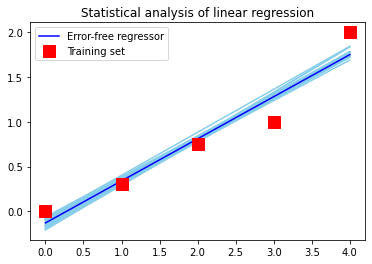

In [9]:
plot_statical_analysis(X_train, y_train, X_eval, 0.05, 20)

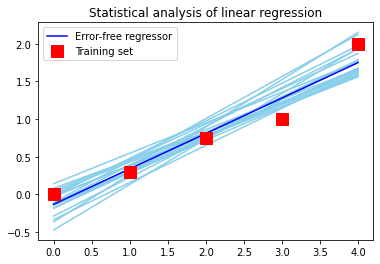

In [10]:
plot_statical_analysis(X_train, y_train, X_eval, 0.2, 20)